In [1]:
# Importing packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm

import seaborn as sns

In [2]:
# Importing the data for analysis and model building

bike_sharing_data = pd.read_csv("day.csv")

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing_data.shape

(730, 16)

In [5]:
# Checking the data info

bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking Missing Values

bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- From the above, it is clear that there are no missing values in the dataset, so we can proceed with further analysis

- Note: Here in the dataset, In yr column we are having only two years (2018 and 2019), so it is considered as a binary categorical variable and this assumption is followed throughout the dataset, in the future if we need to add more years this should be treated as other categorical variables (season_map, month_map, etc..)

In [7]:
# Making categorical variables from numerical to actual ones for EDA

season_map = {1: "spring", 2: 'summer', 3: 'fall', 4: 'winter'}
yr_map = {0: 2018, 1: 2019}
yr_rev_map = {2018: 0, 2019: 1}

month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug",
                               9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
holiday_map = {1: 'holiday', 0: 'not_a_holiday'}

weekday_map = {6: "Mon", 0: "Tue", 1: "Wed", 2: "Thu", 3: "Fri", 4: "Sat", 5: "Sun"}
workingday_map = {1: 'working_day', 0: 'not_a_working_day'}



# 1: Clear, Few clouds, Partly cloudy, Partly cloudy ==> clear_and_cloud
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ==> mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ==> light_snow_rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ==> heavy_snow_rain


weathersit_map = {1: "clear_and_cloud", 2: "mist", 3: "light_snow_rain", 4: "heavy_snow_rain"}

In [8]:
bike_sharing_data["season"] = bike_sharing_data["season"].map(season_map)
bike_sharing_data["yr"] = bike_sharing_data["yr"].map(yr_map)
bike_sharing_data["mnth"] = bike_sharing_data["mnth"].map(month_map)
bike_sharing_data["holiday"] = bike_sharing_data['holiday'].map(holiday_map)
bike_sharing_data["workingday"] = bike_sharing_data["workingday"].map(workingday_map)
bike_sharing_data["weekday"] = bike_sharing_data["weekday"].map(weekday_map)
bike_sharing_data["weathersit"] = bike_sharing_data["weathersit"].map(weathersit_map)

In [9]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,not_a_holiday,Mon,not_a_working_day,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,not_a_holiday,Tue,not_a_working_day,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,not_a_holiday,Wed,working_day,clear_and_cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,not_a_holiday,Thu,working_day,clear_and_cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,not_a_holiday,Fri,working_day,clear_and_cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Describing the data to check range of numerical data

bike_sharing_data.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2018.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Dropping variables that are not needed

bike_sharing_data = bike_sharing_data.drop(["instant", "dteday", "casual", "registered"], axis=1)

# droping the year as there other derived columns from this variable - yr, month

In [12]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,not_a_holiday,Mon,not_a_working_day,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,not_a_holiday,Tue,not_a_working_day,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,not_a_holiday,Wed,working_day,clear_and_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,not_a_holiday,Thu,working_day,clear_and_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,not_a_holiday,Fri,working_day,clear_and_cloud,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

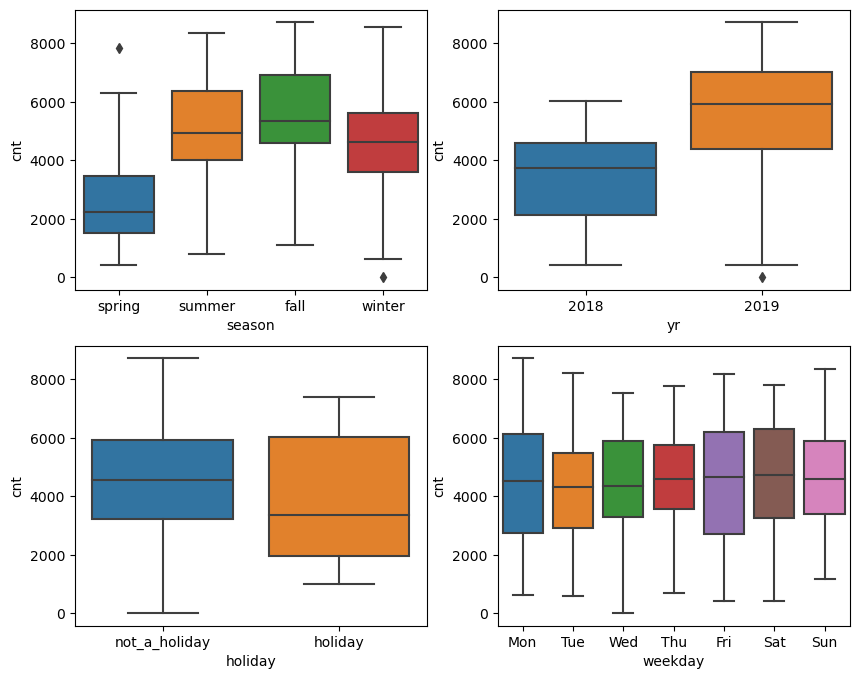

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.boxplot(x="season", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,2)
sns.boxplot(x="yr", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,3)
sns.boxplot(x="holiday", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,4)
sns.boxplot(x="weekday", y="cnt", data=bike_sharing_data)
plt.show()

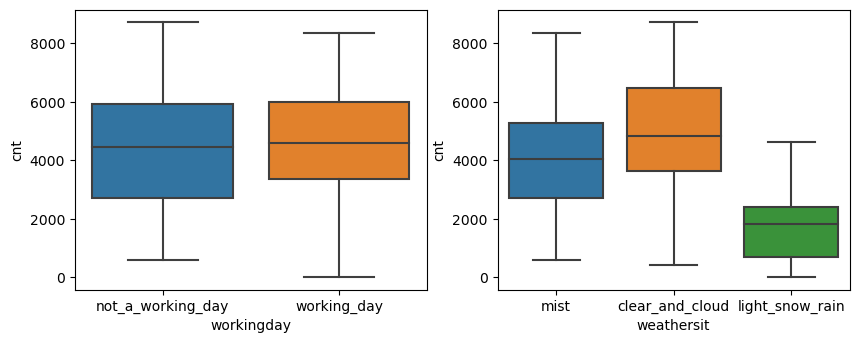

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.boxplot(x="workingday", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,2)
sns.boxplot(x="weathersit", y="cnt", data=bike_sharing_data)
plt.show()

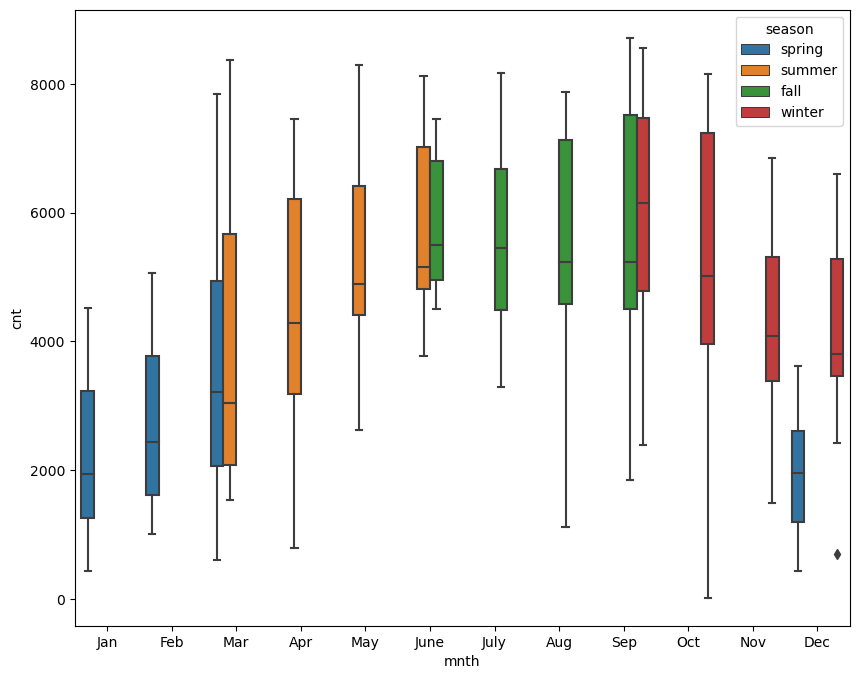

In [15]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="mnth", y="cnt", data=bike_sharing_data, hue="season")
plt.show()

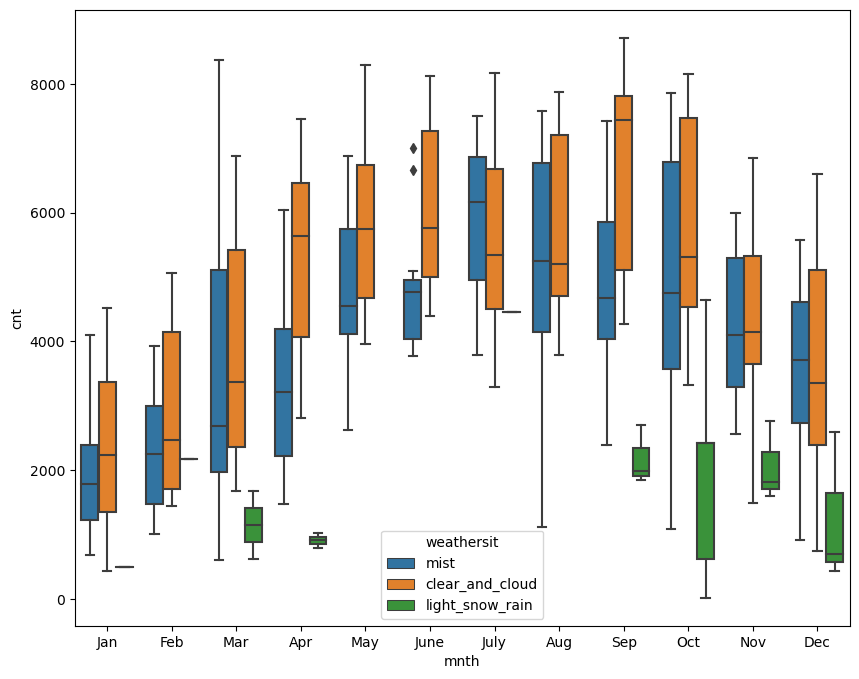

In [16]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="mnth", y="cnt", data=bike_sharing_data, hue="weathersit")
plt.show()

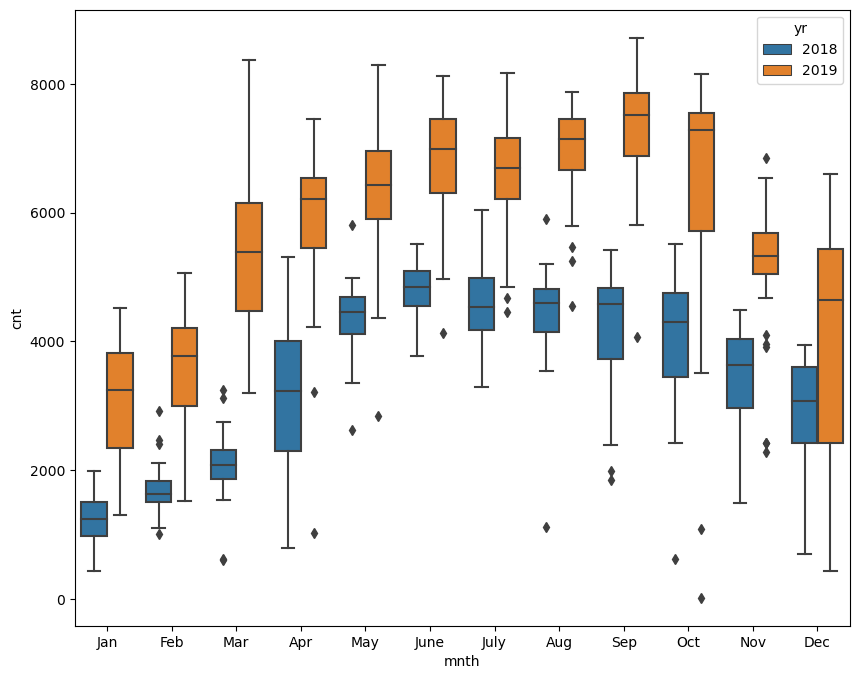

In [17]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="mnth", y="cnt", data=bike_sharing_data, hue="yr")
plt.show()

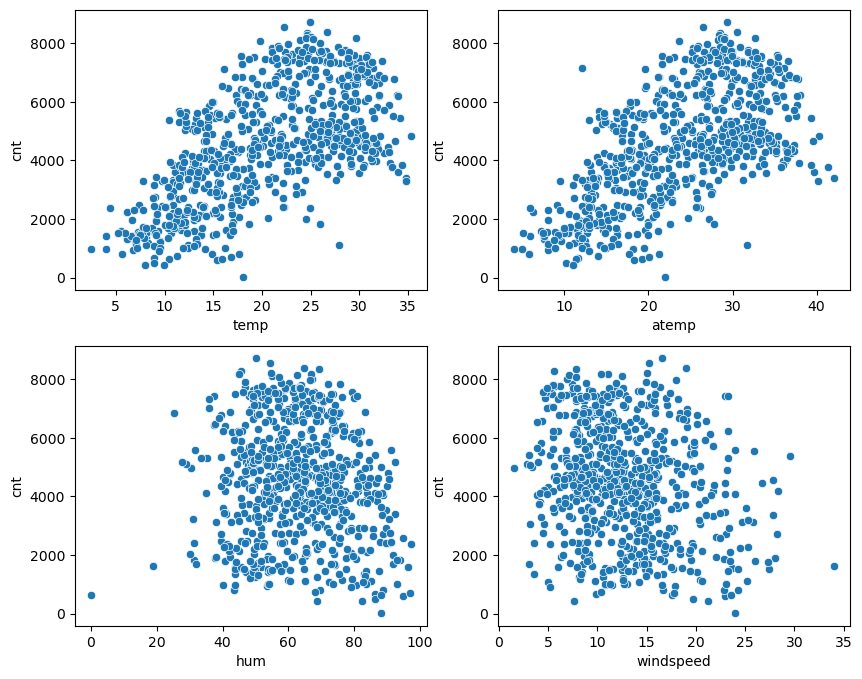

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.scatterplot(x="temp", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,2)
sns.scatterplot(x="atemp", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,3)
sns.scatterplot(x="hum", y="cnt", data=bike_sharing_data)

plt.subplot(2,2,4)
sns.scatterplot(x="windspeed", y="cnt", data=bike_sharing_data)
plt.show()

- From the above scatter plots it is clear that temp and atemp predicts the cnt better than the other two predictors (humidity and windspeed)

 - From all the graph, it is clear that, there is no much outliers in the given data, so we are proceed further with our analysis

<Figure size 1000x800 with 0 Axes>

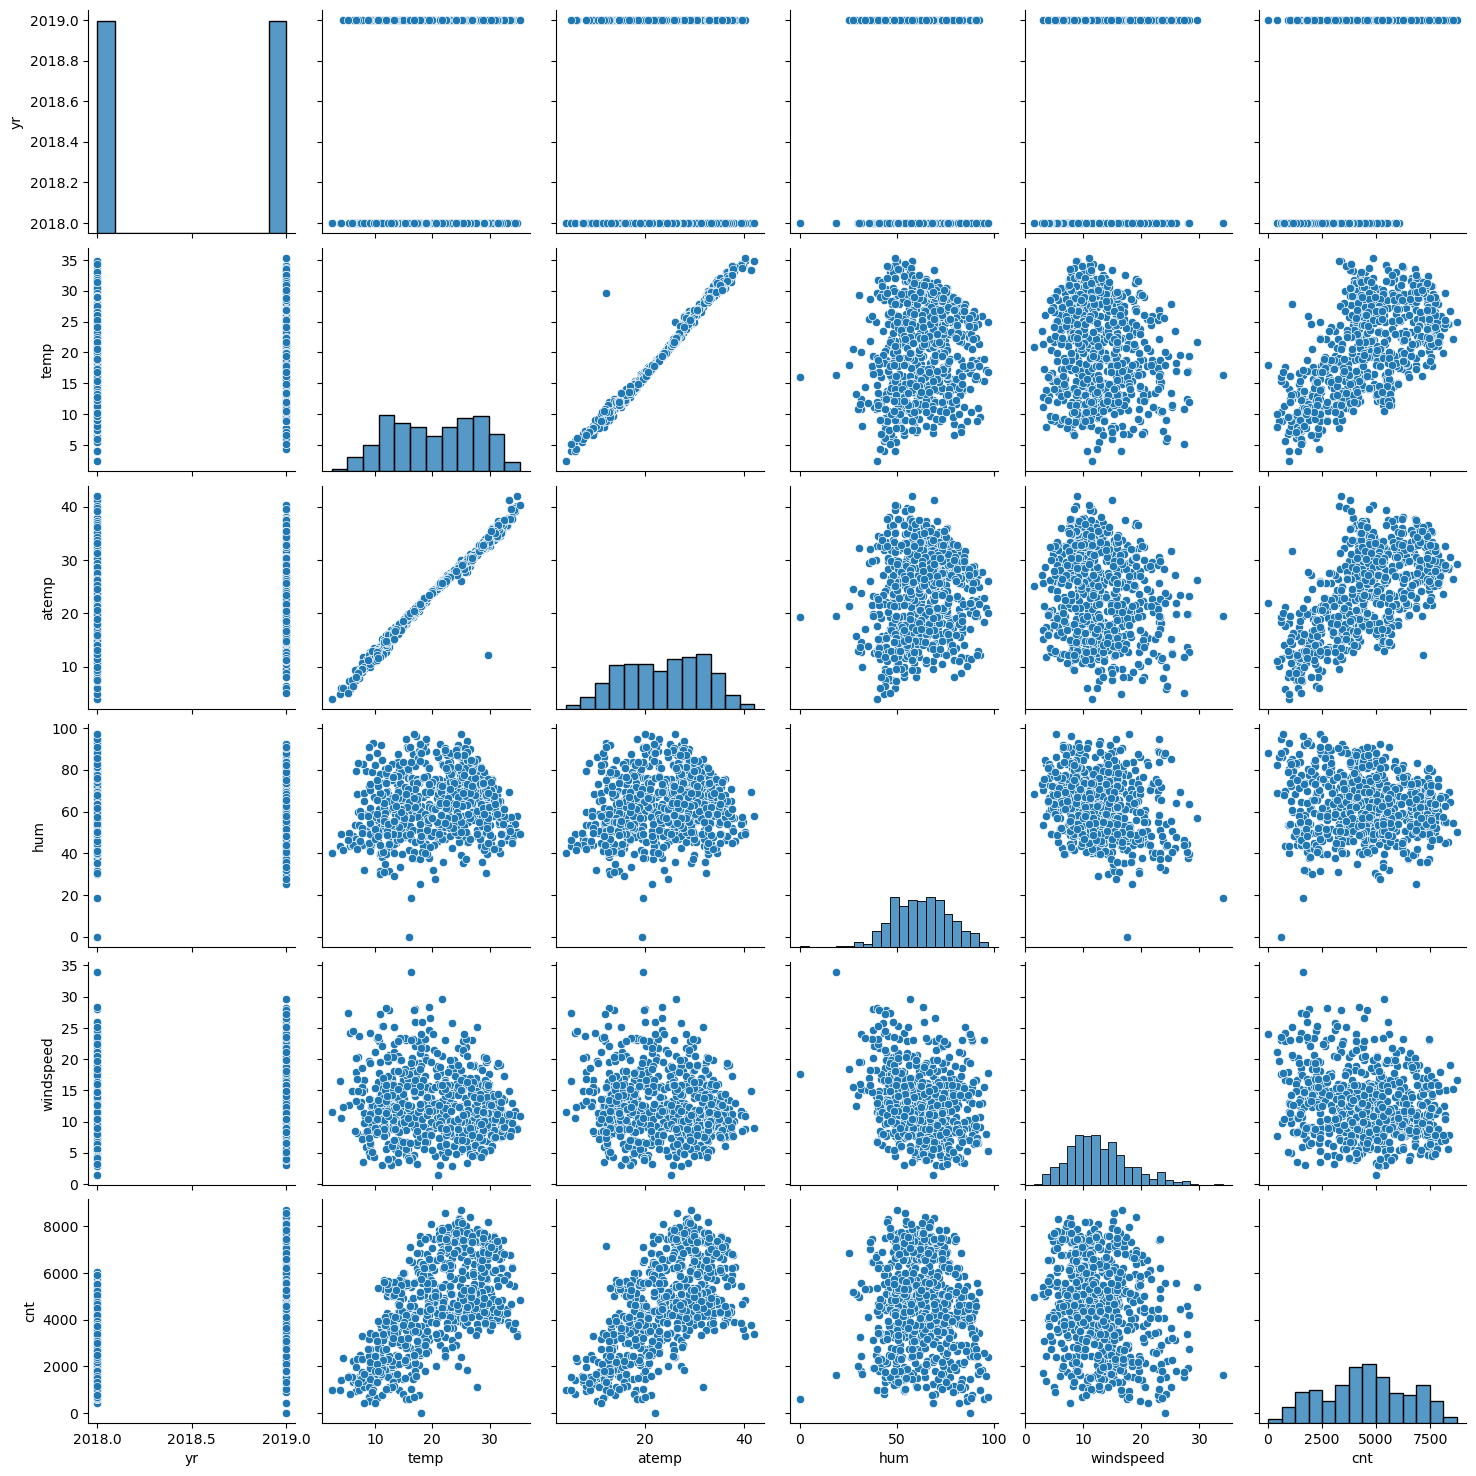

In [19]:
# Pair plot

plt.figure(figsize=(10, 8))
sns.pairplot(bike_sharing_data)
plt.show()

In [20]:
bike_sharing_data.corr()

,yr,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.048789,0.047215,-0.112547,-0.011624,0.569728
temp,0.048789,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Exploring binary and categorical variables

In [21]:
bike_sharing_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [22]:
bike_sharing_data.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [23]:
bike_sharing_data.mnth.value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [24]:
bike_sharing_data.holiday.value_counts()

not_a_holiday    709
holiday           21
Name: holiday, dtype: int64

In [25]:
bike_sharing_data.weekday.value_counts()

Mon    105
Tue    105
Wed    105
Thu    104
Sat    104
Sun    104
Fri    103
Name: weekday, dtype: int64

In [26]:
bike_sharing_data.workingday.value_counts()

working_day          499
not_a_working_day    231
Name: workingday, dtype: int64

In [27]:
bike_sharing_data.weathersit.value_counts()

clear_and_cloud    463
mist               246
light_snow_rain     21
Name: weathersit, dtype: int64

In [28]:
bin_vars = ["workingday", "holiday", "yr"]
cat_variable = ["season", "mnth", "weekday", "weathersit"]

In [29]:
# Encoding the binary and categorical variables

season = pd.get_dummies(bike_sharing_data["season"], drop_first=True)
month = pd.get_dummies(bike_sharing_data["mnth"], drop_first=True)
weekday = pd.get_dummies(bike_sharing_data["weekday"], drop_first=True)
weather_sit = pd.get_dummies(bike_sharing_data["weathersit"], drop_first=True)

In [30]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,not_a_holiday,Mon,not_a_working_day,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,not_a_holiday,Tue,not_a_working_day,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,not_a_holiday,Wed,working_day,clear_and_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,not_a_holiday,Thu,working_day,clear_and_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,not_a_holiday,Fri,working_day,clear_and_cloud,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bike_sharing_data["holiday"] = bike_sharing_data["holiday"].map({'holiday': 1, 'not_a_holiday': 0})
bike_sharing_data["workingday"] = bike_sharing_data["workingday"].map({'working_day': 1, 'not_a_working_day': 0})

In [32]:
bike_sharing_data["yr"] = bike_sharing_data["yr"].map({2018: 0, 2019: 1})

In [33]:
bike_sharing_data = pd.concat([bike_sharing_data, season, month, weekday, weather_sit], axis=1)
bike_sharing_data.drop(columns=cat_variable, inplace=True)

In [34]:
bike_sharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow_rain,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bike_sharing_data.shape

(730, 30)

In [36]:
bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'light_snow_rain', 'mist'],
      dtype='object')

In [37]:
# Split into train-test split

df_train, df_test = train_test_split(bike_sharing_data, train_size=0.7, random_state=100)

In [38]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [39]:
# Scaling the variables so that all the variables are in the same range

scaler = MinMaxScaler()

numerical_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow_rain,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


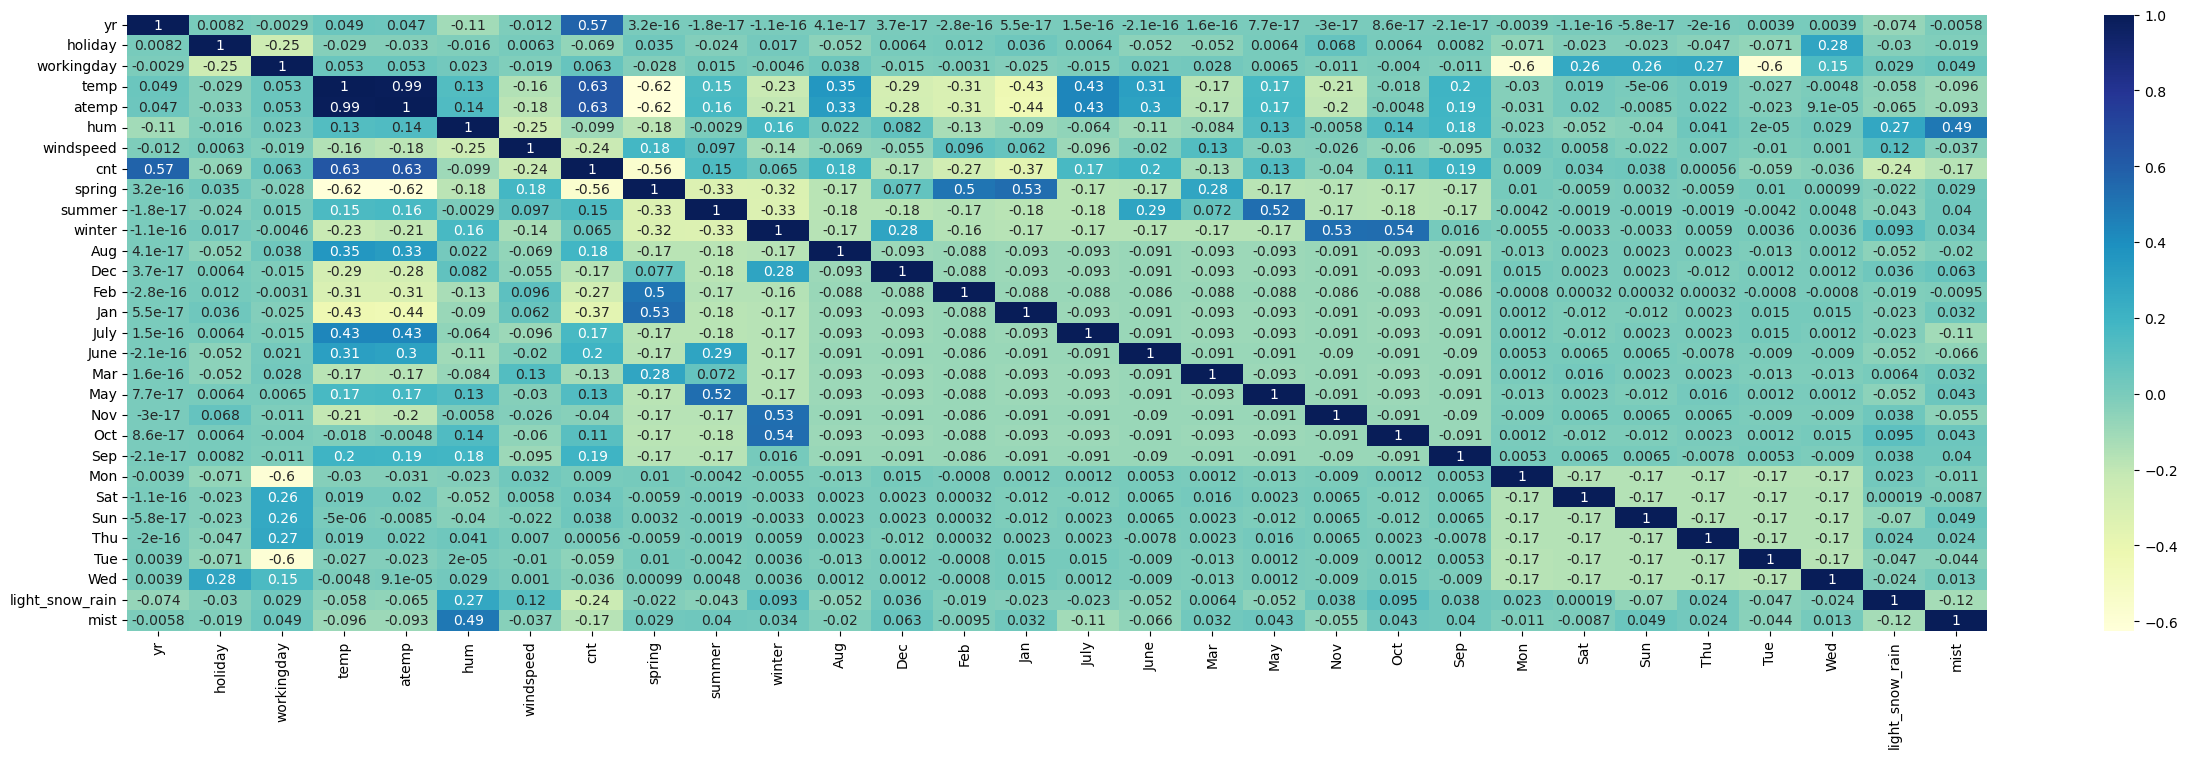

In [42]:
plt.figure(figsize=(30, 8))
sns.heatmap(bike_sharing_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- From the above heapmap, it is evident that the variables that are corelated the best are
    - yr
    - temp
    - atemp
    - and some variables have positive and negative correlation between the target variable

### Building the model

In [43]:
# Separating train and test variables

y_train = df_train.pop("cnt")
x_train = df_train

In [44]:
# importing libraries for Feature selection anb building model

# Recursive feature elimination - In this project we will use a hybrid approach for feature selection (automated and  
# manual approach)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [46]:
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [47]:
# Variables that are significant are marked as 1, and the variables follwing that are marked in the same order

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 11),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('light_snow_rain', True, 1),
 ('mist', True, 1)]

In [48]:
columns = x_train.columns[rfe.ranking_ == 1]
print(columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'Mon', 'light_snow_rain',
       'mist'],
      dtype='object')


In [49]:
x_train_rfe = x_train[columns]

In [50]:
x_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,July,Sep,Mon,light_snow_rain,mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


### Build model with all the parameters that are selected as a significant variable from the automated approach (Recursive Feature Selection)

In [51]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr = sm.api.add_constant(x_train_rfe)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr)

# Fit the model

lr_model = lr.fit()

In [52]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        22:14:18   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                 0.0814      0.016      4.945      0.000       0.049       0.114
Mon                 0.0536      0.014      3.694      0.000       0.025       0.082
light_snow_rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
mist               -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [54]:
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,mist,2.29
0,yr,2.09
12,Mon,1.98


### Removing hum - Model - 1

- As July has a p-value slightly high than other variables' p-value, we can try removing July and re-build the model

In [55]:
# Removing Year with high VIF

x_train_rfe_1 = x_train_rfe.drop(columns=['hum'], axis=1)

In [56]:
x_train_rfe_1.head()

,yr,holiday,workingday,temp,windspeed,spring,summer,winter,Jan,July,Sep,Mon,light_snow_rain,mist
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,1


In [57]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr_1 = sm.api.add_constant(x_train_rfe_1)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr_1)

# Fit the model

lr_model = lr.fit()

In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        22:14:22   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer              0.0445      0.015      2.967      0.003       0.015       0.074
winter              0.0784      0.017      4.562      0.000       0.045       0.112
Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep                 0.0755      0.017      4.527      0.000       0.043       0.108
Mon                 0.0583      0.015      3.968      0.000       0.029       0.087
light_snow_rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
mist               -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_1.values, i) for i in range(x_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [60]:
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,Mon,1.97
8,Jan,1.62
9,July,1.59


In [61]:
x_train_rfe_1.head()

,yr,holiday,workingday,temp,windspeed,spring,summer,winter,Jan,July,Sep,Mon,light_snow_rain,mist
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,1


### Removing workingday - Model 2

In [62]:
# holiday, Sep, July Jan

- Removing hum variable as it has a high Variable Inflation Factor value, as it may influence tha output with other variables

In [63]:
x_train_rfe_2 = x_train_rfe_1.drop(columns=['workingday'], axis=1)
x_train_rfe_2.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Jan,July,Sep,Mon,light_snow_rain,mist
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1


In [64]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr_2 = sm.api.add_constant(x_train_rfe_2)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr_2)

# Fit the model

lr_model = lr.fit()

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.48e-186
Time:                        22:14:26   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2120      0.030      6.978      0.000       0.152       0.272
yr                  0.2347      0.008     28.620      0.000       0.219       0.251
holiday            -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                0.4734      0.034     13.837      0.000       0.406       0.541
windspeed          -0.1570      0.025     -6.226      0.000      -0.207      -0.107
spring             -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer              0.0437      0.015      2.871      0.004       0.014       0.074
winter              0.0755      0.017      4.334      0.000       0.041       0.110
Jan                -0.0386      0.018     -2.159      0.031      -0.074      -0.003
July               -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sep                 0.0762      0.017      4.504      0.000       0.043       0.109
Mon                 0.0201      0.011      1.787      0.075      -0.002       0.042
light_snow_rain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
mist               -0.0794      0.009     -9.097      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_2.values, i) for i in range(x_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [67]:
x_train_rfe_2.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jan', 'July', 'Sep', 'Mon', 'light_snow_rain', 'mist'],
      dtype='object')

In [68]:
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.24
0,yr,2.07
6,winter,1.80
7,Jan,1.61
8,July,1.59
12,mist,1.56
9,Sep,1.34


### Removing Mon - Model 3

In [69]:
x_train_rfe_3 = x_train_rfe_2.drop(columns=['Mon'], axis=1)
x_train_rfe_3.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Jan,July,Sep,light_snow_rain,mist
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,1


In [70]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr_3 = sm.api.add_constant(x_train_rfe_3)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr_3)

# Fit the model

lr_model = lr.fit()

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.14e-187
Time:                        22:14:29   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030      7.088      0.000       0.156       0.275
yr                  0.2343      0.008     28.517      0.000       0.218       0.250
holiday            -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                0.4721      0.034     13.772      0.000       0.405       0.539
windspeed          -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring             -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer              0.0434      0.015      2.845      0.005       0.013       0.073
winter              0.0757      0.017      4.335      0.000       0.041       0.110
Jan                -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July               -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep                 0.0764      0.017      4.506      0.000       0.043       0.110
light_snow_rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
mist               -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_3.values, i) for i in range(x_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [73]:
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,July,1.59
11,mist,1.56
9,Sep,1.34


### Removing Jan - Model 4

In [74]:
x_train_rfe_4 = x_train_rfe_3.drop(columns=['Jan'], axis=1)
x_train_rfe_4.head()

,yr,holiday,temp,windspeed,spring,summer,winter,July,Sep,light_snow_rain,mist
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,1


In [75]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr_4 = sm.api.add_constant(x_train_rfe_4)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr_4)

# Fit the model

lr_model = lr.fit()

In [76]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.06e-187
Time:                        22:14:30   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
yr                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer              0.0465      0.015      3.051      0.002       0.017       0.076
winter              0.0817      0.017      4.730      0.000       0.048       0.116
July               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                 0.0768      0.017      4.517      0.000       0.043       0.110
light_snow_rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
mist               -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_4.values, i) for i in range(x_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [78]:
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,July,1.58
10,mist,1.55
8,Sep,1.34
9,light_snow_rain,1.08


In [79]:
# Jan, light_snow_rain, Sep, 

### Removing July - Model 5

In [80]:
x_train_rfe_5 = x_train_rfe_4.drop(columns=['July'], axis=1)
x_train_rfe_5.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Sep,light_snow_rain,mist
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,1


In [81]:
# Build OLS Model with all the parameters

# Adding a constant

x_train_rfe_lr_5 = sm.api.add_constant(x_train_rfe_5)

# Initialising the model

lr = OLS(y_train, x_train_rfe_lr_5)

# Fit the model

lr_model = lr.fit()

In [82]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.47e-186
Time:                        22:14:33   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030      6.447      0.000       0.133       0.249
yr                  0.2341      0.008     28.237      0.000       0.218       0.250
holiday            -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                0.4777      0.033     14.423      0.000       0.413       0.543
windspeed          -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring             -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer              0.0621      0.014      4.350      0.000       0.034       0.090
winter              0.0945      0.017      5.630      0.000       0.062       0.127
Sep                 0.0910      0.016      5.566      0.000       0.059       0.123
light_snow_rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
mist               -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_5.values, i) for i in range(x_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [84]:
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist,1.55
7,Sep,1.23
8,light_snow_rain,1.08
1,holiday,1.04


In [85]:
# Model Parameters

parameters = x_train_rfe_5.columns
print(parameters)

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Sep', 'light_snow_rain', 'mist'],
      dtype='object')


- From all the above, based on the combinations tried, the below are the parameters which I finds the best fit for the model

- Final Equation

y_hat = 0.190855 + 0.234132 * yr  - 0.096316 * holiday + 0.477737 * temp - 0.148098 * windspeed - 0.055406 * spring + 0.062076 * summer + 0.094476 * winter + 0.090998 * sep - 0.285031 * light_snow_rain - 0.078741 * mist

### Prediction

In [86]:
lr_model.params

const              0.190855
yr                 0.234132
holiday           -0.096316
temp               0.477737
windspeed         -0.148098
spring            -0.055406
summer             0.062076
winter             0.094476
Sep                0.090998
light_snow_rain   -0.285031
mist              -0.078741
dtype: float64

In [87]:
y_train_pred = lr_model.predict(x_train_rfe_lr_5)

In [88]:
residuals = y_train - y_train_pred

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


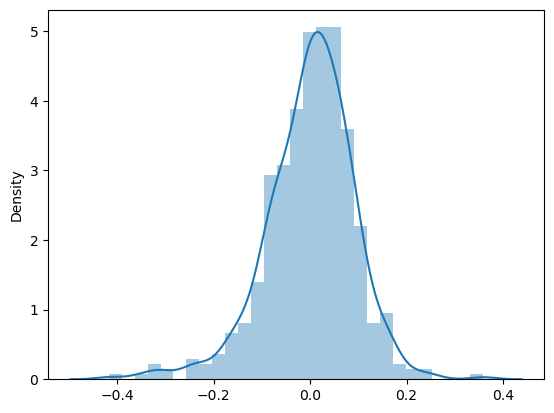

In [89]:
plt.figure()
sns.distplot(residuals)
plt.show()

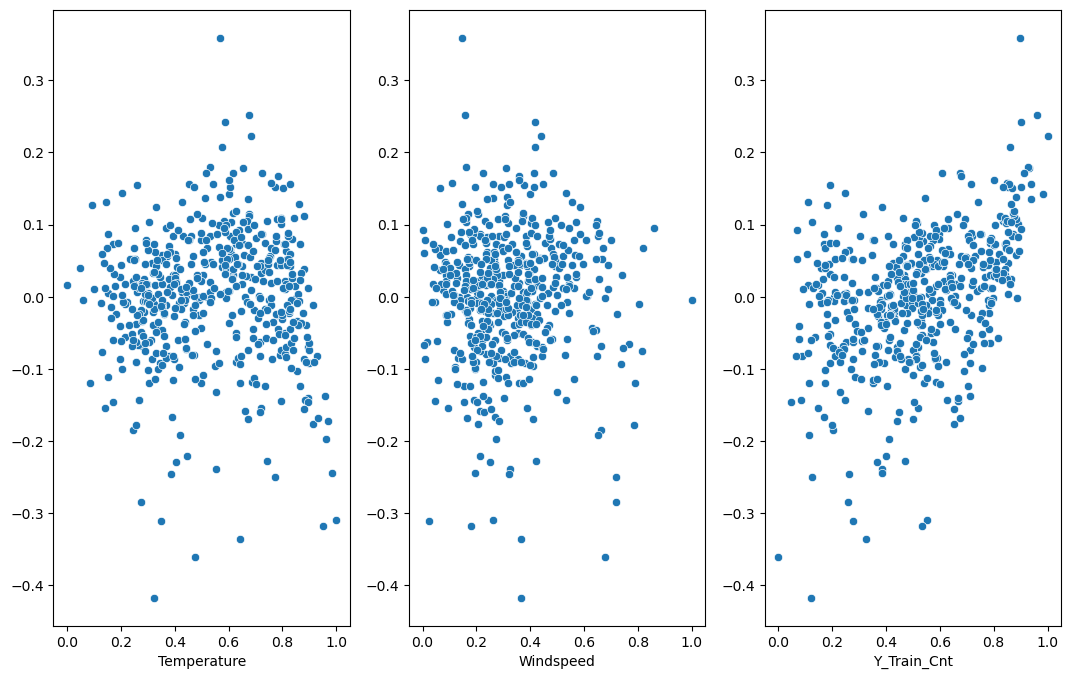

In [90]:
plt.figure(figsize=(13, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_train_rfe_5["temp"], y=residuals)
plt.xlabel("Temperature")

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_train_rfe_5["windspeed"], y=residuals)
plt.xlabel("Windspeed")

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_train, y=residuals)
plt.xlabel("Y_Train_Cnt")

plt.show()



In [91]:
# RegPlot to Check - Homoskedasticity

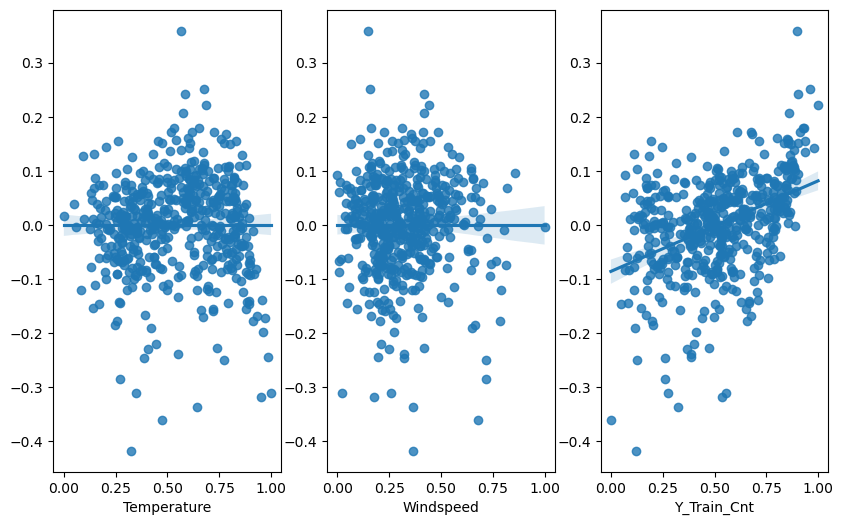

In [92]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.regplot(x=x_train_rfe_5["temp"], y=residuals)
plt.xlabel("Temperature")

plt.subplot(1, 3, 2)
sns.regplot(x=x_train_rfe_5["windspeed"], y=residuals)
plt.xlabel("Windspeed")

plt.subplot(1, 3, 3)
sns.regplot(x=y_train, y=residuals)
plt.xlabel("Y_Train_Cnt")

plt.show()


### Test Prediction

In [93]:
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [94]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow_rain,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [95]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_snow_rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Evaluating Model on Test dataset

In [96]:
y_test = df_test.pop('cnt')
x_test = df_test

In [97]:
# Add a constant

x_test_sm = sm.api.add_constant(x_test)
x_test_sm = x_test_sm[x_train_rfe_lr_5.columns]

In [98]:
y_test_pred = lr_model.predict(x_test_sm)

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [100]:
# R-Squared Error

In [101]:
test_accuracy = r2_score(y_test, y_test_pred)
print("Test Accuracy: ", round(test_accuracy, 4)*100)

Test Accuracy:  80.38


In [102]:
train_accuracy = r2_score(y_train, y_train_pred)
print("Train Accuracy: ", round(train_accuracy, 4)*100)

Train Accuracy:  83.27


In [103]:
# Mean Squared Error

In [104]:
test_mse = mean_squared_error(y_test, y_test_pred)
print("MSE: ", round(test_mse, 2))

MSE:  0.01


In [105]:
p = len(lr_model.params) - 1

In [106]:
test_adj_accracy = 1 - (((1 - test_accuracy) * (len(x_test_sm) - 1)) / (len(x_test_sm) - p - 1))
print("Adjusted R-Squared for test set: ", round(test_adj_accracy, 3)* 100)

Adjusted R-Squared for test set:  79.4


In [122]:
train_adj_accracy = 1 - (((1 - train_accuracy) * (len(x_train) - 1)) / (len(x_train) - p - 1))
print("Adjusted R-Squared for train set: ", round(train_adj_accracy, 2)* 100)

Adjusted R-Squared for train set:  83.0


Text(0, 0.5, 'Y_Test_Prediction')

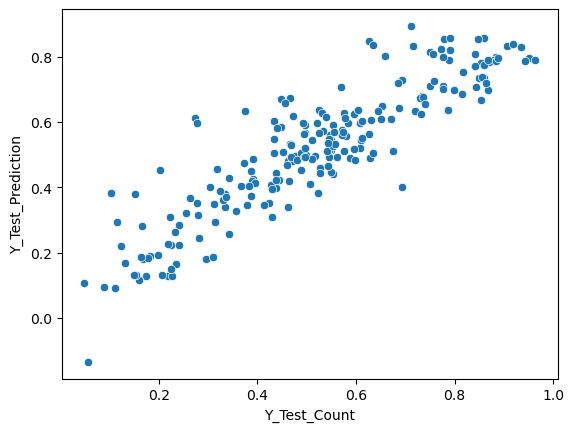

In [107]:
plt.figure()
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Y_Test_Count")
plt.ylabel("Y_Test_Prediction")

In [108]:
# Original Dataset

In [109]:
x_test_all = pd.concat([x_test, y_test], axis=1)
x_test_all[numerical_vars] = scaler.inverse_transform(x_test_all[numerical_vars])

In [110]:
col = list(x_train_rfe_5.columns)
col.append('cnt')
print(col)

['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Sep', 'light_snow_rain', 'mist', 'cnt']


In [111]:
x_test_all = x_test_all[col]

In [112]:
x_test_all = x_test_all.rename(columns={'cnt': 'Count'})

In [113]:
x_pred_all = pd.concat([x_test, y_test_pred], axis=1)
x_pred_all = x_pred_all.rename(columns={0: 'cnt'})
x_pred_all[numerical_vars] = scaler.inverse_transform(x_pred_all[numerical_vars])
x_pred_all = x_pred_all[col]


In [114]:
x_test_all = pd.concat([x_test_all, x_pred_all['cnt']], axis=1)

In [115]:
x_test_all.rename(columns={'cnt': 'Predicted Count'}, inplace=True)

In [116]:
x_test_all["Predicted Count"] = x_test_all["Predicted Count"].apply(lambda x: round(x, 2))

In [117]:
x_test_all.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Sep,light_snow_rain,mist,Count,Predicted Count
184,0,1,29.793347,5.459106,0,0,0,0,0,1,6043.0,3504.87
535,1,0,32.082500,7.625404,0,1,0,0,0,0,6211.0,7800.52
299,0,0,19.270000,13.250121,0,0,1,0,0,1,2659.0,3513.39
221,0,0,31.433347,13.417286,0,0,0,0,0,0,4780.0,4904.73
152,0,0,29.315000,19.583229,0,1,0,0,0,0,4968.0,4922.28
